In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import precision_recall_curve
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

#F1-Score Expectation Maximization in O(n^2)
#https://www.kaggle.com/mmueller/f1-score-expectation-maximization-in-o-n
#https://github.com/KazukiOnodera/Instacart/blob/master/py_model/opt_fscore.py

from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score , log_loss
from sklearn.ensemble import RandomForestClassifier

from datetime import datetime
from tqdm import tqdm
import pickle

In [6]:
#read the features files generated earlier
data = pd.HDFStore("Data_v1.h5")
train_data = data['train']
test_data  = data['test']
train_y = train_data['reordered'].values.tolist()
train_x = train_data.drop(['user_id', 'product_id', 'order_id', 'reordered'], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, stratify=train_y, test_size=0.1, random_state = 42)


Training Started :


C:\Users\Pallavi\anaconda3\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-logloss:0.33697	valid-logloss:0.33721
[10]	train-logloss:0.31539	valid-logloss:0.31783
[20]	train-logloss:0.29671	valid-logloss:0.30103
[30]	train-logloss:0.28224	valid-logloss:0.28845
[40]	train-logloss:0.27134	valid-logloss:0.27929
[50]	train-logloss:0.26270	valid-logloss:0.27236
[60]	train-logloss:0.25554	valid-logloss:0.26679
[70]	train-logloss:0.24965	valid-logloss:0.26239
[80]	train-logloss:0.24517	valid-logloss:0.25938
[90]	train-logloss:0.24078	valid-logloss:0.25658
[100]	train-logloss:0.23734	valid-logloss:0.25461
[110]	train-logloss:0.23394	valid-logloss:0.25261
[120]	train-logloss:0.23086	valid-logloss:0.25102
[130]	train-logloss:0.22829	valid-logloss:0.24985
[140]	train-logloss:0.22623	valid-logloss:0.24902
[150]	train-logloss:0.22423	valid-logloss:0.24821
[160]	train-logloss:0.22235	valid-logloss:0.24767
[170]	train-logloss:0.22035	valid-logloss:0.24695
[180]	train-logloss:0.21853	valid-logloss:0.24632
[190]	train-logloss:0.21688	valid-logloss:0.24586
[200]	train

C:\Users\Pallavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


The test log loss is: 0.24292359567035127
Feature Importance


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

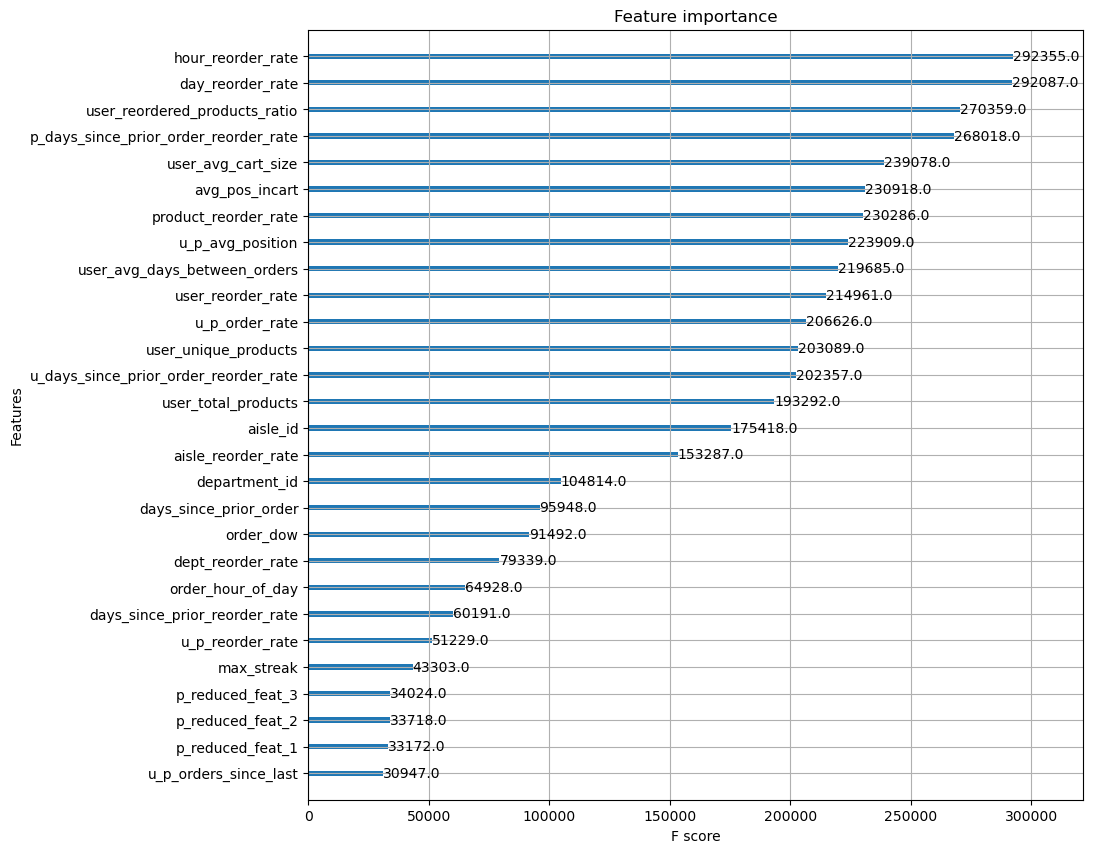

In [15]:
#using  XGBBoosting algorithm with 300Boosting rounds with eta as 0.02

params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = ['logloss']
params['eta'] = 0.02
params['max_depth'] = 15
params['nthread']=-1
params['colsample_bytree'] = 0.4
#params['tree_method'] = 'gpu_hist'

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

 #output Training Time
start_time = datetime.now()
print("Training Started :")
xgb_model = xgb.train(params, d_train, 300, watchlist, early_stopping_rounds=20, verbose_eval=10)
print("Training Completed ")
end_time = datetime.now()
difference = end_time - start_time
time = divmod(difference.total_seconds() , 360)
print("Total Time : {} minutes {} seconds".format(time[0], time[1]))
    
#get probabilities for validation set
predict_y = xgb_model.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=[0,1], eps=1e-15))
    

print("Feature Importance")
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(booster = xgb_model, ax = ax)




In [41]:
pickle.dump(xgb_model, open("xgb_v4.pkl", "wb"))   

Training Started :


C:\Users\Pallavi\anaconda3\Lib\site-packages\xgboost\core.py:726: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-logloss:0.33697	valid-logloss:0.33721
[10]	train-logloss:0.31539	valid-logloss:0.31783
[20]	train-logloss:0.29671	valid-logloss:0.30103
[30]	train-logloss:0.28224	valid-logloss:0.28845
[40]	train-logloss:0.27134	valid-logloss:0.27929
[50]	train-logloss:0.26270	valid-logloss:0.27236
[60]	train-logloss:0.25554	valid-logloss:0.26679
[70]	train-logloss:0.24965	valid-logloss:0.26239
[80]	train-logloss:0.24517	valid-logloss:0.25938
[90]	train-logloss:0.24078	valid-logloss:0.25658
[100]	train-logloss:0.23734	valid-logloss:0.25461
[110]	train-logloss:0.23394	valid-logloss:0.25261
[120]	train-logloss:0.23086	valid-logloss:0.25102
[130]	train-logloss:0.22829	valid-logloss:0.24985
[140]	train-logloss:0.22623	valid-logloss:0.24902
[150]	train-logloss:0.22423	valid-logloss:0.24821
[160]	train-logloss:0.22235	valid-logloss:0.24767
[170]	train-logloss:0.22035	valid-logloss:0.24695
[180]	train-logloss:0.21853	valid-logloss:0.24632
[190]	train-logloss:0.21688	valid-logloss:0.24586
[200]	train

C:\Users\Pallavi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2845: FutureWarning: Setting the eps parameter is deprecated and will be removed in 1.5. Instead eps will always havea default value of `np.finfo(y_pred.dtype).eps`.
  warnings.warn(


The test log loss is: 0.24215167994157424
Feature Importance


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

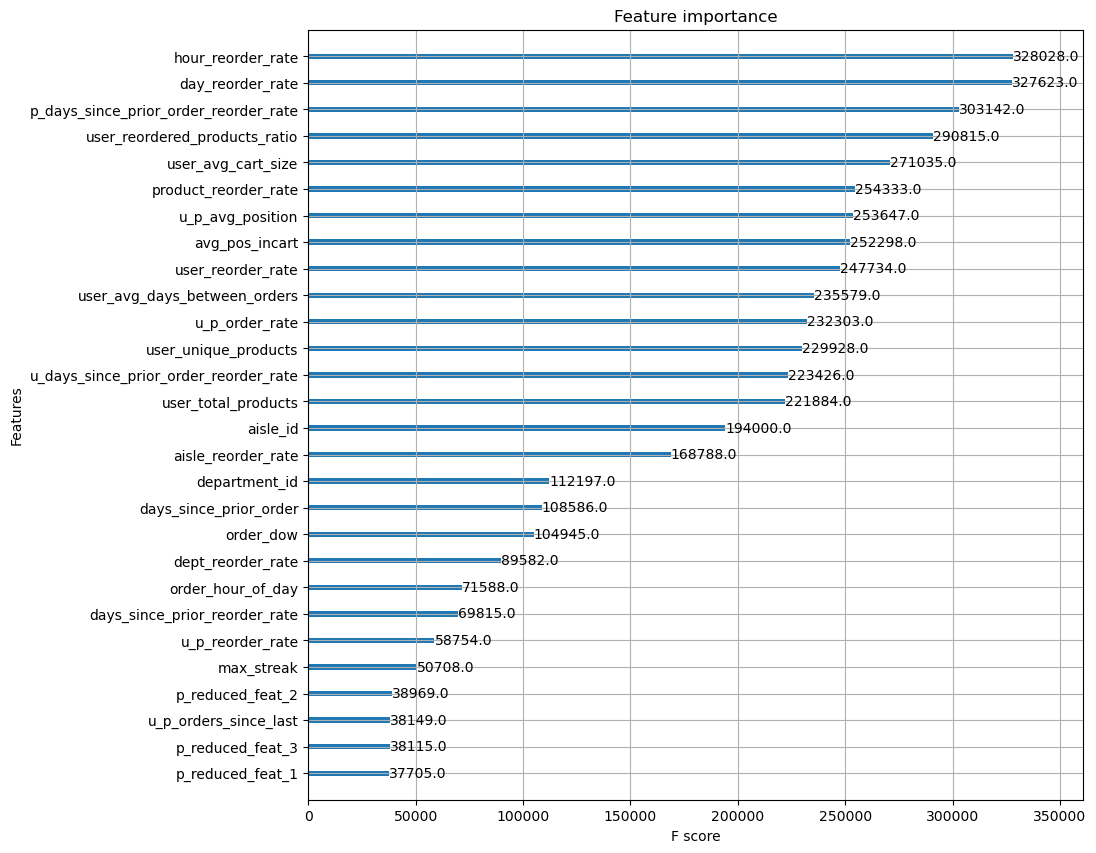

In [7]:
# lets try some hyper tuning the parameters manually.. Here I am chaning the boosting rounds from 300 to 350
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = ['logloss']
params['eta'] = 0.02
params['max_depth'] = 15
params['nthread']=-1
params['colsample_bytree'] = 0.4
#params['tree_method'] = 'gpu_hist'

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

 #output Training Time
start_time = datetime.now()
print("Training Started :")
xgb_model = xgb.train(params, d_train, 350, watchlist, early_stopping_rounds=20, verbose_eval=10)
print("Training Completed ")
end_time = datetime.now()
difference = end_time - start_time
time = divmod(difference.total_seconds() , 360)
print("Total Time : {} minutes {} seconds".format(time[0], time[1]))
    
#get probabilities for validation set
predict_y = xgb_model.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=[0,1], eps=1e-15))
    

print("Feature Importance")
fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(booster = xgb_model, ax = ax)

In [38]:
#lets adjust f1 score , threshold
# Calculate precision, recall, and F1 score
precision, recall, thresholds = precision_recall_curve(y_test, predict_y)

f1_scores = 2 * (precision * recall) / (precision + recall)
print("F1 Score:", f1_scores)
# Find the index of the maximum F1 score
best_threshold_index = f1_scores.argmax()

# Get the threshold value at the index of the maximum F1 score
best_threshold = thresholds[best_threshold_index]

print("Best Threshold:", best_threshold)

adjusted_predictions = [1 if prob >= best_threshold else 0 for prob in predicted_y]
print("Accuracy :",accuracy_score(y_test, adjusted_predictions))
print("Precision :",precision_score(y_test, adjusted_predictions))

F1 Score: [1.78173997e-01 1.78174189e-01 1.78174380e-01 ... 4.82602191e-05
 2.41304007e-05 0.00000000e+00]
Best Threshold: 0.21217029
Accuracy : 0.9105310295268134
Precision : 0.6687057923915122


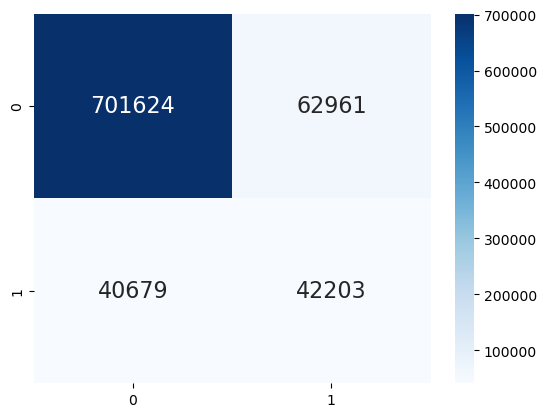

Accuracy : 0.8777061525699525
Precision : 0.40130653075196837
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93    764585
         1.0       0.40      0.51      0.45     82882

    accuracy                           0.88    847467
   macro avg       0.67      0.71      0.69    847467
weighted avg       0.89      0.88      0.88    847467



In [39]:
# Plot confusion Matrix # for the params
#params = {}
#params['objective'] = 'binary:logistic'
#params['eval_metric'] = ['logloss']
#params['eta'] = 0.02
#params['max_depth'] = 15
#params['nthread']=-1
#params['colsample_bytree'] = 0.4

#predicted_y =np.array(predict_y>0.5,dtype=int)
predicted_y =np.array(predict_y> best_threshold,dtype=int)
cm = confusion_matrix(y_test, predicted_y)
sns.heatmap(cm, cmap='Blues', annot = True, fmt="g", annot_kws={"size": 16})
plt.show()
print("Accuracy :",accuracy_score(y_test, predicted_y))
print("Precision :",precision_score(y_test, predicted_y))
print("Classification Report:")
print(classification_report(y_test, predicted_y))

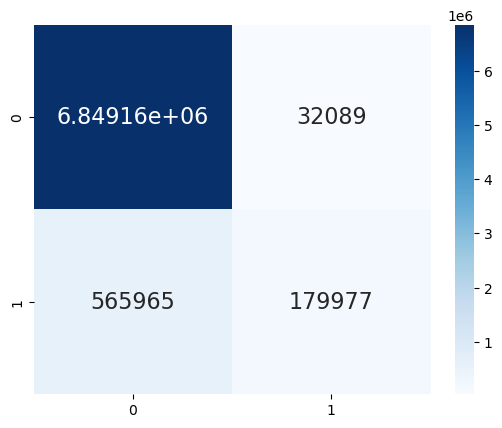

Accuracy : 0.921589250253763
Precision : 0.8486839002951911


In [14]:
# Plot confusion Matrix for training data
predict_y1 = xgb_model.predict(d_train)
predicted_y1 =np.array(predict_y1>0.5,dtype=int)
cm = confusion_matrix(y_train, predicted_y1)
sns.heatmap(cm, cmap='Blues', annot = True, fmt="g", annot_kws={"size": 16})
plt.show()
print("Accuracy :",accuracy_score(y_train, predicted_y1))
print("Precision :",precision_score(y_train, predicted_y1))

In [17]:
%%time
#get scores on given test data from instacart
# test data has no re-order column 
#XGBoost library in its native API doesn't have a predict_proba method
#like some other classifiers in scikit-learn. Instead, you can use the predict method, 
#which returns the raw output scores, and then manually convert them into probabilities.
data = test_data.drop(['user_id', 'product_id', 'order_id'], axis = 1)
dtest = xgb.DMatrix(data)
ypred = xgb_model.predict(dtest)

test_data['reordered'] =  ypred




CPU times: total: 11min 43s
Wall time: 1min 42s


In [20]:
products  = pd.read_csv('../data/products.csv')

In [22]:
user_products_probability_subset = pd.merge(test_data[['user_id','product_id','reordered']],products, on='product_id', how = 'inner')
user_products_probability_subset = user_products_probability_subset[['user_id','product_name','reordered']]
#productList = test_data[test_data['user_id'] == 2291].sort_values(by='probability', ascending = False).head(10)[['user_id','product_id','probability']]
productList = user_products_probability_subset[user_products_probability_subset['user_id'] == 1109].sort_values(by='reordered', ascending = False).head(5)

print(productList)

         user_id                              product_name  reordered
439333      1109                        Organic Spring Mix   0.429374
2665018     1109  Blue Machine Boosted 100% Juice Smoothie   0.414753
2018060     1109                            Collard Greens   0.332163
2389656     1109                             Garlic Hummus   0.267704
1661817     1109                       Organic Rolled Oats   0.248221


In [25]:
user_products_probability_subset = pd.merge(test_data[['user_id','product_id','reordered']],products, on='product_id', how = 'inner')
user_products_probability_subset = user_products_probability_subset[['user_id','product_name','reordered']]
productList = user_products_probability_subset[user_products_probability_subset['user_id'] == 2291].sort_values(by='reordered', ascending = False).head(5)

print(productList)

         user_id                                   product_name  reordered
1638294     2291                         Pulp Free Orange Juice   0.537211
362303      2291                            Large Alfresco Eggs   0.402349
380184      2291                           Organic Baby Arugula   0.388662
1686757     2291  Organic Gluten & Wheat Free Homestyle Waffles   0.345751
276460      2291                                          Limes   0.323584


In [3]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from datetime import datetime

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'objective': ['binary:logistic'],
    'eval_metric': [['logloss']],
    'eta': [0.01, 0.02, 0.05, 0.1],
    'max_depth': [5, 10, 15, 20],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6],
    'subsample': [0.8, 0.9, 1.0],
}

# Create an XGBoost DMatrix for the full dataset
d_full = xgb.DMatrix(X_train, label=y_train)

# Create the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    xgb_classifier, 
    param_distributions=param_grid, 
    n_iter=10, 
    scoring='neg_log_loss',  # Use the appropriate scoring metric
    cv=3, 
    n_jobs=-1
)

# Output Training Time
start_time = datetime.now()
print("Hyperparameter Tuning Started :")

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Output Training Time
end_time = datetime.now()
difference = end_time - start_time
time = divmod(difference.total_seconds() , 360)
print("Hyperparameter Tuning Completed ")
print("Total Time : {} minutes {} seconds".format(time[0], time[1]))

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

Hyperparameter Tuning Started :


PicklingError: Could not pickle the task to send it to the workers.